In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.contingency import association
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
import plotly.express as px

%matplotlib inline

In [2]:
df1 = pd.read_csv("ds_salaries.csv")
df2 = pd.read_csv("ds_salaries_2022.csv", index_col=0)

In [3]:
#df1.head()

In [4]:
#df2.head()

In [5]:
df1.shape

(3755, 11)

In [6]:
df2.shape

(607, 11)

In [7]:
#df1.info()

In [8]:
#df2.info()

In [9]:
#df1.describe()

In [10]:
#df2.describe()

In [11]:
df = pd.concat([df1, df2], ignore_index=True)

In [12]:
#df.head()

In [13]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [14]:
df1.duplicated().sum()

1171

In [15]:
df2.duplicated().sum()

42

In [16]:
df.shape

(4362, 11)

In [17]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.head(10)
#print(len(duplicate_rows))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
163,2023,SE,FT,Applied Scientist,309400,USD,309400,US,0,US,L
164,2023,SE,FT,Applied Scientist,159100,USD,159100,US,0,US,L
167,2023,MI,FT,Data Engineer,162500,USD,162500,US,0,US,M
168,2023,MI,FT,Data Engineer,130000,USD,130000,US,0,US,M
171,2023,SE,FT,Data Engineer,145000,USD,145000,US,0,US,M


In [18]:
#df_no_dup = df.drop_duplicates(keep='last')

In [19]:
#df_no_dup.shape

In [20]:
df['work_year'].value_counts()

work_year
2022    1982
2023    1785
2021     447
2020     148
Name: count, dtype: int64

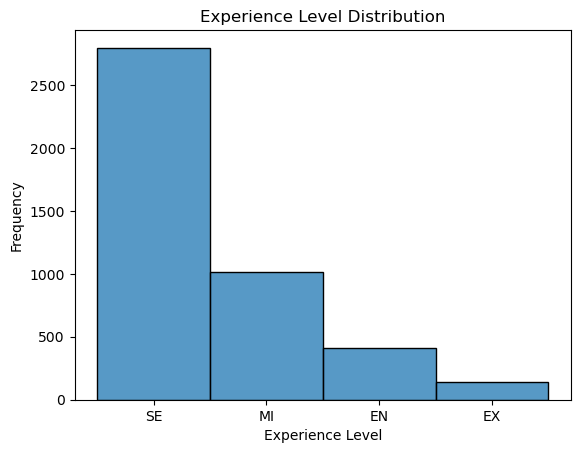

In [21]:
sns.histplot(df['experience_level'], bins=4, kde=False)
plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Frequency')
plt.show()

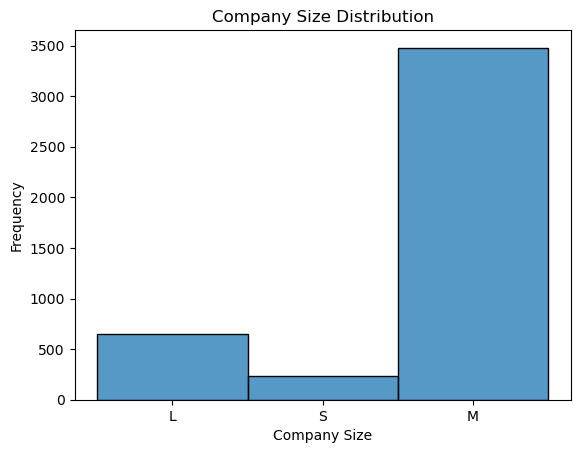

In [22]:
sns.histplot(df['company_size'], bins=3, kde=False)
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Frequency')
plt.show()

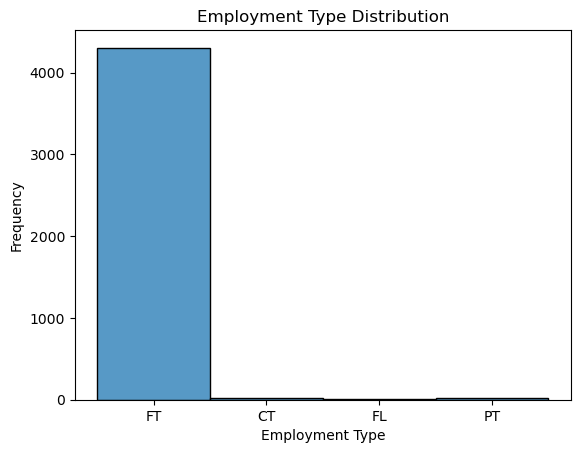

In [23]:
sns.histplot(df['employment_type'], bins=4, kde=False)
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Frequency')
plt.show()

In [24]:
df['employment_type'].value_counts()

employment_type
FT    4306
PT      27
CT      15
FL      14
Name: count, dtype: int64

In [25]:
df = df[df['employment_type'] == 'FT']

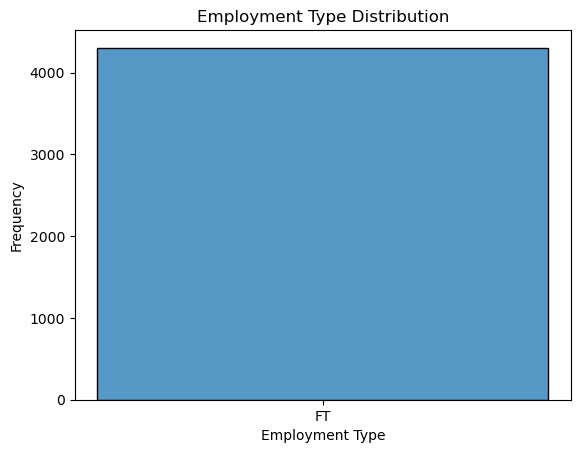

In [26]:
sns.histplot(df['employment_type'], bins=4, kde=False)
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Frequency')
plt.show()

In [27]:
df.drop(columns=['employment_type'], inplace=True)

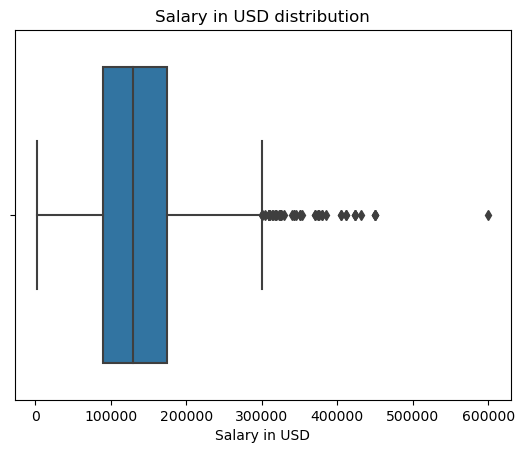

In [28]:
sns.boxplot(x='salary_in_usd', data=df)
plt.title('Salary in USD distribution')
plt.xlabel('Salary in USD')
plt.show() 

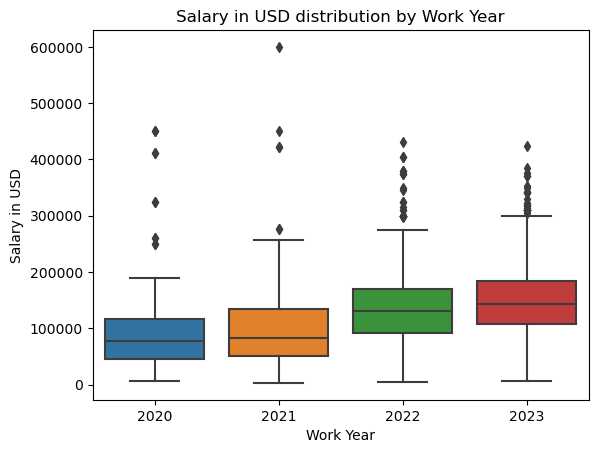

In [29]:
sns.boxplot(x='work_year', y='salary_in_usd', data=df)
plt.title('Salary in USD distribution by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.show()

In [30]:
df['job_title'].unique()

array(['Principal Data Scientist', 'Data Scientist', 'Applied Scientist',
       'Data Analyst', 'Data Modeler', 'Research Engineer',
       'Analytics Engineer', 'Business Intelligence Engineer',
       'Machine Learning Engineer', 'Data Strategist', 'Data Engineer',
       'Computer Vision Engineer', 'Data Quality Analyst',
       'Compliance Data Analyst', 'Data Architect',
       'Applied Machine Learning Engineer', 'AI Developer',
       'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Big Data Engineer', 'Data Specialist', 'Lead Data Analyst',
       'BI Data Engineer', 'Director of Data Science',
       'Machine Learning Scientist', 'MLOps Engineer', 'AI Scientist',
       'Autonomous Vehicle Technician',
       'Applied Machine Learning Scientist', 'Lead Data Scientist',
       'Cloud

In [169]:
job_categories = {
    "Principal Data Scientist": "Data Science & Machine Learning",
    "ML Engineer": "Data Science & Machine Learning",
    "Data Scientist": "Data Science & Machine Learning",
    "Applied Scientist": "Data Science & Machine Learning",
    "Research Scientist": "Data Science & Machine Learning",
    "Applied Machine Learning Engineer": "Data Science & Machine Learning",
    "Machine Learning Researcher": "Data Science & Machine Learning",
    "Machine Learning Scientist": "Data Science & Machine Learning",
    "Applied Machine Learning Scientist": "Data Science & Machine Learning",
    "Deep Learning Researcher": "Data Science & Machine Learning",
    "Machine Learning Infrastructure Engineer": "Data Science & Machine Learning",
    "NLP Engineer": "Data Science & Machine Learning",
    "Machine Learning Research Engineer": "Data Science & Machine Learning",
    "Principal Machine Learning Engineer": "Data Science & Machine Learning",
    "Machine Learning Manager": "Data Science & Machine Learning",
    "Lead Machine Learning Engineer": "Data Science & Machine Learning",
    "Machine Learning Developer": "Data Science & Machine Learning",
    "Data Analyst": "Data Analysis & Analytics",
    "Analytics Engineer": "Data Analysis & Analytics",
    "Data Analytics Manager": "Data Analysis & Analytics",
    "Business Data Analyst": "Data Analysis & Analytics",
    "Staff Data Analyst": "Data Analysis & Analytics",
    "Lead Data Analyst": "Data Analysis & Analytics",
    "BI Data Analyst": "Data Analysis & Analytics",
    "Insight Analyst": "Data Analysis & Analytics",
    "BI Analyst": "Data Analysis & Analytics",
    "Data Analytics Specialist": "Data Analysis & Analytics",
    "Data Analytics Lead": "Data Analysis & Analytics",
    "Product Data Analyst": "Data Analysis & Analytics",
    "Marketing Data Analyst": "Data Analysis & Analytics",
    "Finance Data Analyst": "Data Analysis & Analytics",
    "Data Modeler": "Data Engineering & Infrastructure",
    "Data Engineer": "Data Engineering & Infrastructure",
    "ETL Engineer": "Data Engineering & Infrastructure",
    "Data DevOps Engineer": "Data Engineering & Infrastructure",
    "Big Data Engineer": "Data Engineering & Infrastructure",
    "Cloud Database Engineer": "Data Engineering & Infrastructure",
    "Data Infrastructure Engineer": "Data Engineering & Infrastructure",
    "Software Data Engineer": "Data Engineering & Infrastructure",
    "Data Operations Engineer": "Data Engineering & Infrastructure",
    "Cloud Data Engineer": "Data Engineering & Infrastructure",
    "ETL Developer": "Data Engineering & Infrastructure",
    "Cloud Data Architect": "Data Engineering & Infrastructure",
    "Lead Data Engineer": "Data Engineering & Infrastructure",
    "Principal Data Engineer": "Data Engineering & Infrastructure",
    "Staff Data Scientist": "Data Engineering & Infrastructure",
    "Business Intelligence Engineer": "Business Intelligence (BI)",
    "BI Data Engineer": "Business Intelligence (BI)",
    "BI Developer": "Business Intelligence (BI)",
    "Head of Data Science": "Business Intelligence (BI)",
    "BI Data Analyst": "Business Intelligence (BI)",
    "Power BI Developer": "Business Intelligence (BI)",
    "Data Strategist": "Data Management",
    "Director of Data Science": "Data Management",
    "Head of Data": "Data Management",
    "Data Science Manager": "Data Management",
    "Data Manager": "Data Management",
    "Manager Data Management": "Data Management",
    "Data Management Specialist": "Data Management",
    "MLOps Engineer": "Artificial Intelligence (AI)",
    "Computer Vision Engineer": "Artificial Intelligence (AI)",
    "Computer Vision Software Engineer": "Artificial Intelligence (AI)",
    "3D Computer Vision Researcher": "Artificial Intelligence (AI)",
    "AI Developer": "Artificial Intelligence (AI)",
    "AI Scientist": "Artificial Intelligence (AI)",
    "Head of Machine Learning": "Artificial Intelligence (AI)",
    "AI Programmer": "Artificial Intelligence (AI)",
    "Data Quality Analyst": "Data Management",
    "Compliance Data Analyst": "Data Management",
    "Autonomous Vehicle Technician": "Data Management",  # Assumed mapping due to similarity
    "Applied Machine Learning Scientist": "Data Science & Machine Learning",  # Assumed mapping
    "Lead Data Scientist": "Data Science & Machine Learning",  # Assumed mapping
    "Data Architect": "Data Engineering & Infrastructure",  # Assumed mapping
    "Finance Data Analyst": "Data Analysis & Analytics",  # Duplicate mapping
    "Data Lead": "Data Management",  # Assumed mapping
    "Data Science Engineer": "Data Engineering & Infrastructure",  # Assumed mapping
    "Data Science Lead": "Data Science & Machine Learning",  # Assumed mapping
    "Deep Learning Engineer": "Data Science & Machine Learning",  # Assumed mapping
    "Machine Learning Software Engineer": "Data Science & Machine Learning",  # Assumed mapping
    "Big Data Architect": "Data Engineering & Infrastructure",  # Assumed mapping
    "Cloud Database Engineer": "Data Engineering & Infrastructure",  # Duplicate mapping
    "Data Analytics Engineer": "Data Analysis & Analytics",  # Assumed mapping
    "Data Management Specialist": "Data Management",  # Duplicate mapping
    "Data Scientist Lead": "Data Science & Machine Learning",  # Assumed mapping
    "Cloud Data Engineer": "Data Engineering & Infrastructure",  # Duplicate mapping
    "Data Operations Analyst": "Data Engineering & Infrastructure",  # Assumed mapping
    "Marketing Data Analyst": "Data Analysis & Analytics",  # Duplicate mapping
    "Power BI Developer": "Business Intelligence (BI)",  # Duplicate mapping
    "Product Data Scientist": "Data Management",  # Duplicate mapping
    "Financial Data Analyst": "Data Analysis & Analytics",  # Assumed mapping
    "Data Science Consultant": "Data Management",  # Assumed mapping
    "AI Developer": "Artificial Intelligence (AI)",  # Duplicate mapping
    "Data Analytics Specialist": "Data Analysis & Analytics",  # Duplicate mapping
    "Business Data Analyst": "Data Analysis & Analytics",  # Duplicate mapping
    "Lead Data Engineer": "Data Engineering & Infrastructure",  # Duplicate mapping
    "BI Data Engineer": "Business Intelligence (BI)",  # Duplicate mapping
    "Data Engineer": "Data Engineering & Infrastructure",  # Duplicate mapping
    "BI Developer": "Business Intelligence (BI)",  # Duplicate mapping
    "Data Science Tech Lead": "Data Science & Machine Learning",  # Assumed mapping
    "Data Operations Engineer": "Data Engineering & Infrastructure",  # Duplicate mapping
    "BI Analyst": "Data Analysis & Analytics",  # Duplicate mapping
    "Data Science Consultant": "Data Science & Machine Learning",  # Assumed mapping
    "Data Science Lead": "Data Science & Machine Learning",  # Duplicate mapping
    "Lead Data Scientist": "Data Science & Machine Learning",  # Duplicate mapping
    "Data Scientist Lead": "Data Science & Machine Learning",  # Duplicate mapping
    "Data Operations Analyst": "Data Engineering & Infrastructure",  # Duplicate mapping
    "Marketing Data Engineer": "Data Management",  # Duplicate mapping
    "AI Programmer": "Artificial Intelligence (AI)",  # Duplicate mapping
    "Computer Vision Software Engineer": "Artificial Intelligence (AI)",  # Duplicate mapping
    "Azure Data Engineer": "Data Engineering & Infrastructure",  # Assumed mapping
    "Principal Data Architect": "Data Engineering & Infrastructure",  # Assumed mapping
    "Data Analytics Consultant": "Data Analysis & Analytics",  # Assumed mapping
    "Data Management Specialist": "Data Management",  # Duplicate mapping
    "Data Scientist": "Data Science & Machine Learning",  # Duplicate mapping
    "Data Manager": "Data Management",  # Assumed mapping
    "Data Engineering Manager": "Data Engineering & Infrastructure", #assumed mapping
    'Director of Data Engineering': "Data Engineering & Infrastructure", #assumed mapping
    "Software Data Engineer": "Data Engineering & Infrastructure",  # Duplicate mapping
    "Research Engineer": "Data Science & Machine Learning",
    "Machine Learning Engineer": "Data Science & Machine Learning",
    "Applied Data Scientist": "Data Science & Machine Learning",
    "Data Specialist": "Data Engineering & Infrastructure",
    "Principal Data Analyst": "Data Analysis & Analytics"
}


In [170]:
top10_jobs = df['job_title'].value_counts()[:10]
# Create a bar plot for the top 10 job titles
fig = px.bar(y= top10_jobs.values, x = top10_jobs.index, 
            text = top10_jobs.values, title = 'Top 10 Jobs Designation')
fig.update_layout(xaxis_title = 'Job Designations', yaxis_title= 'Count')
fig.show()

job_title
Data Science & Machine Learning      1715
Data Engineering & Infrastructure    1395
Data Analysis & Analytics             899
Data Management                       147
Artificial Intelligence (AI)           64
Business Intelligence (BI)             48
Name: count, dtype: int64


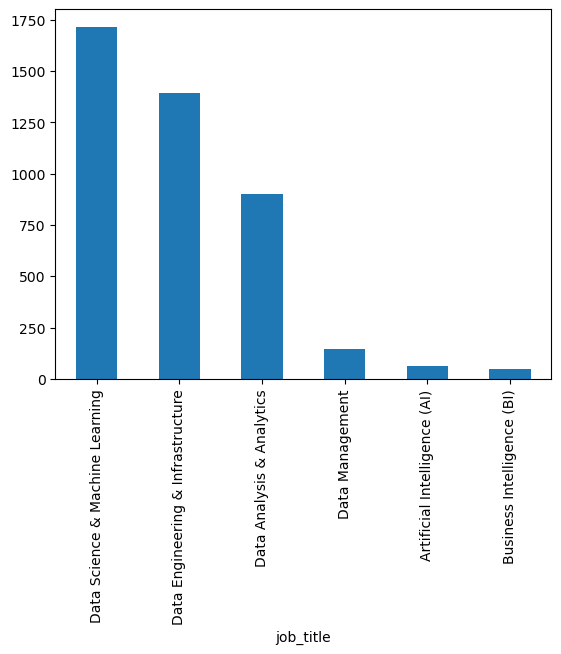

In [171]:
# Job titles were organized into 10 categories due to redundancies
df_mapped_jobs = df.job_title.map(lambda x: job_categories[x])
print(df_mapped_jobs.value_counts())
df_mapped_jobs.value_counts().plot(kind="bar");

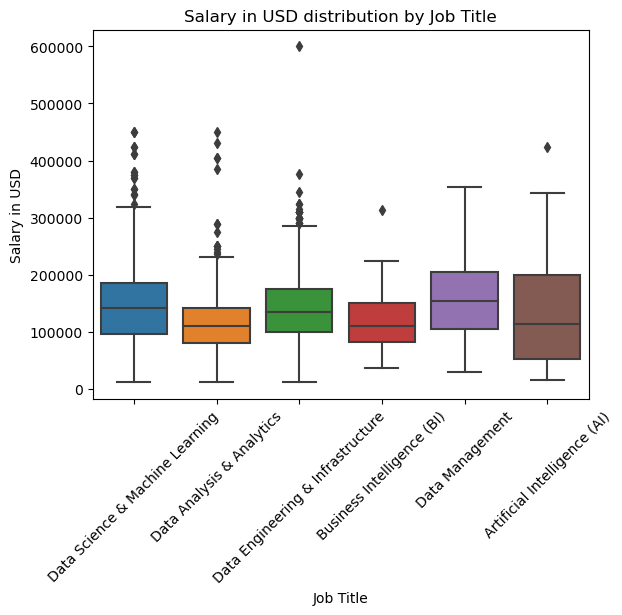

In [172]:
sns.boxplot(x=df_mapped_jobs, y='salary_in_usd', data=df)
plt.title('Salary in USD distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)  
#plt.tight_layout() 
plt.show()

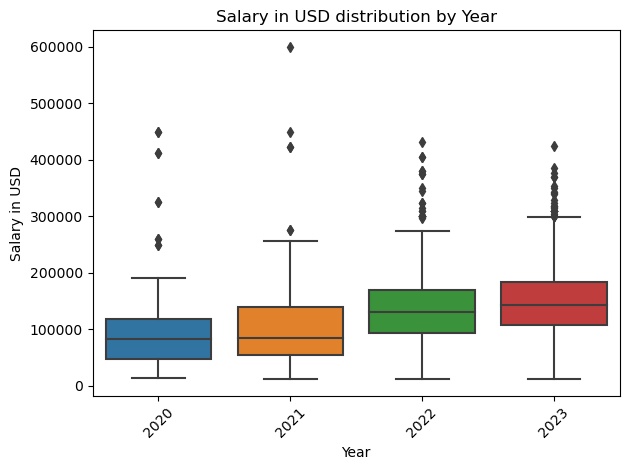

In [173]:
sns.boxplot(x='work_year', y='salary_in_usd', data=df)
plt.title('Salary in USD distribution by Year')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

In [174]:
df.select_dtypes("number").columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

In [175]:
df.select_dtypes("number").nunique().sort_values(ascending=False)

salary_in_usd    1047
salary            792
work_year           4
remote_ratio        3
dtype: int64

In [176]:
df.select_dtypes("object").nunique().sort_values(ascending=False)

job_title             91
employee_residence    72
company_location      65
salary_currency       20
experience_level       4
company_size           3
dtype: int64

In [177]:
df['employee_residence'].unique()

array(['ES', 'CA', 'US', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'IE', 'UA', 'IL', 'AT', 'CO', 'SG', 'SE',
       'SI', 'MX', 'UZ', 'TH', 'GH', 'HR', 'BR', 'KW', 'VN', 'CY', 'AR',
       'AM', 'BA', 'KE', 'GR', 'LV', 'RO', 'PK', 'IT', 'PL', 'LT', 'AS',
       'HU', 'SK', 'CR', 'CL', 'PR', 'BO', 'PH', 'BE', 'TR', 'EG', 'ID',
       'AE', 'MY', 'JP', 'EE', 'HN', 'CZ', 'RU', 'IQ', 'BG', 'JE', 'RS',
       'NZ', 'DK', 'MD', 'LU', 'MT', 'CN'], dtype=object)

In [207]:
country_continent_map = {
    'ES': 'Europe',  # Spain -> Europe
    'CA': 'North America',  # Canada -> North America
    'US': 'North America',  # United States -> North America
    'DE': 'Europe',  # Germany -> Europe
    'GB': 'Europe',  # United Kingdom -> Europe
    'NG': 'Other',  # Nigeria -> Other
    'IN': 'Other',  # India -> Other
    'HK': 'Other',  # Hong Kong -> Other
    'PT': 'Europe',  # Portugal -> Europe
    'NL': 'Europe',  # Netherlands -> Europe
    'CH': 'Europe',  # Switzerland -> Europe
    'CF': 'Other',  # Central African Republic -> Other
    'FR': 'Europe',  # France -> Europe
    'AU': 'Other',  # Australia -> Other
    'FI': 'Europe',  # Finland -> Europe
    'IE': 'Europe',  # Ireland -> Europe
    'UA': 'Europe',  # Ukraine -> Europe
    'IL': 'Other',  # Israel -> Other
    'GH': 'Other',  # Ghana -> Other
    'AT': 'Europe',  # Austria -> Europe
    'CO': 'Other',  # Colombia -> Other
    'SG': 'Other',  # Singapore -> Other
    'SE': 'Europe',  # Sweden -> Europe
    'SI': 'Europe',  # Slovenia -> Europe
    'MX': 'North America',  # Mexico -> North America
    'BR': 'Other',  # Brazil -> Other
    'TH': 'Other',  # Thailand -> Other
    'HR': 'Europe',  # Croatia -> Europe
    'KW': 'Other',  # Kuwait -> Other
    'VN': 'Other',  # Vietnam -> Other
    'CY': 'Europe',  # Cyprus -> Europe
    'AR': 'Other',  # Argentina -> Other
    'AM': 'Other',  # Armenia -> Other
    'BA': 'Europe',  # Bosnia and Herzegovina -> Europe
    'KE': 'Other',  # Kenya -> Other
    'GR': 'Europe',  # Greece -> Europe
    'MK': 'Europe',  # North Macedonia -> Europe
    'LV': 'Europe',  # Latvia -> Europe
    'RO': 'Europe',  # Romania -> Europe
    'PK': 'Other',  # Pakistan -> Other
    'IT': 'Europe',  # Italy -> Europe
    'MA': 'Other',  # Morocco -> Other
    'PL': 'Europe',  # Poland -> Europe
    'LT': 'Europe',  # Lithuania -> Europe
    'AS': 'Other',  # American Samoa -> Other
    'HU': 'Europe',  # Hungary -> Europe
    'SK': 'Europe',  # Slovakia -> Europe
    'CZ': 'Europe',  # Czech Republic -> Europe
    'CR': 'North America',  # Costa Rica -> North America
    'TR': 'Other',  # Turkey -> Other
    'CL': 'Other',  # Chile -> Other
    'PR': 'North America',  # Puerto Rico -> North America
    'BO': 'Other',  # Bolivia -> Other
    'PH': 'Other',  # Philippines -> Other
    'BE': 'Europe',  # Belgium -> Europe
    'EG': 'Other',  # Egypt -> Other
    'ID': 'Other',  # Indonesia -> Other
    'AE': 'Other',  # United Arab Emirates -> Other
    'MY': 'Other',  # Malaysia -> Other
    'JP': 'Other',  # Japan -> Other
    'EE': 'Europe',  # Estonia -> Europe
    'HN': 'North America',  # Honduras -> North America
    'RU': 'Europe',  # Russia -> Europe (Note: Russia spans Europe and Asia)
    'IQ': 'Other',  # Iraq -> Other
    'BG': 'Europe',  # Bulgaria -> Europe
    'JE': 'Europe',  # Jersey -> Europe
    'RS': 'Europe',  # Serbia -> Europe
    'NZ': 'Other',  # New Zealand -> Other
    'DK': 'Europe',  # Denmark -> Europe
    'MD': 'Europe',  # Moldova -> Europe
    'LU': 'Europe',  # Luxembourg -> Europe
    'MT': 'Europe',  # Malta -> Europe
    'CN': 'Other',  # China -> Other
    'IR': 'Other',  # Iran -> Other
    'AL': 'Europe',  # Albania -> Europe
    'UZ': 'Other',  # Uzbekistan -> Other
}


employee_residence
North America    3454
Europe            602
Other             212
Name: count, dtype: int64


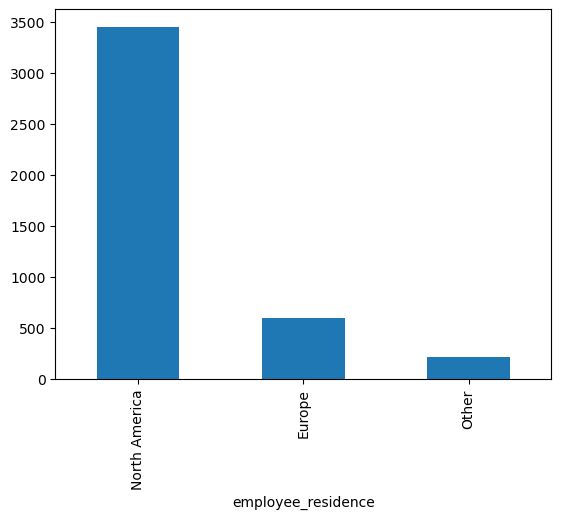

In [208]:
# Employee Residence were organized into 6 continents due to redundancies
df_mapped_e_residence = df.employee_residence.map(lambda x: country_continent_map[x])
print(df_mapped_e_residence.value_counts())
df_mapped_e_residence.value_counts().plot(kind="bar");

In [209]:
df['company_location'].unique()

array(['ES', 'CA', 'US', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'IE', 'UA', 'IL', 'CO', 'SG', 'AU', 'SE', 'SI', 'MX',
       'PT', 'RU', 'TH', 'GH', 'HR', 'BR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'LV', 'RO', 'PK', 'IT', 'PL', 'AR', 'LT', 'AS', 'CR', 'HU',
       'AT', 'SK', 'PR', 'PH', 'BE', 'ID', 'TR', 'EG', 'AE', 'MY', 'HN',
       'CZ', 'JP', 'IQ', 'DK', 'CN', 'NZ', 'CL', 'MD', 'LU', 'MT'],
      dtype=object)

company_location
North America    3502
Europe            591
Other             175
Name: count, dtype: int64


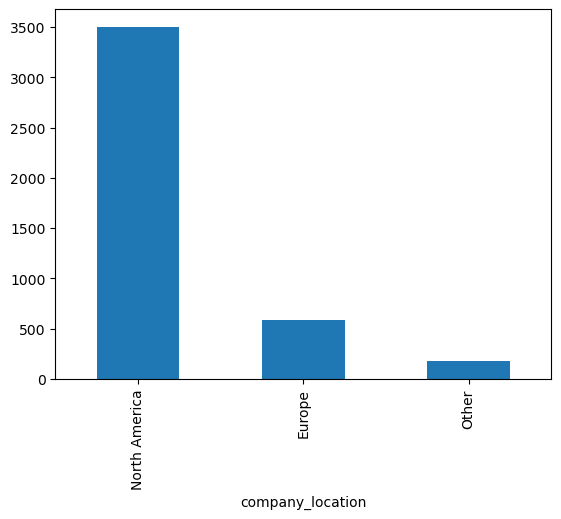

In [210]:
# Company location were organized into 6 continents due to redundancies
df_mapped_com_location = df.company_location.map(lambda x: country_continent_map[x])
print(df_mapped_com_location.value_counts())
df_mapped_com_location.value_counts().plot(kind="bar");

In [211]:
sorted_df = df.sort_values("salary_in_usd")
sorted_df.head(50)

,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1248,2023,EN,Data Engineer,12000,USD,12000,VN,0,VN,L
2021,2022,EN,Machine Learning Engineer,12000,USD,12000,AR,100,AR,L
3915,2021,MI,Data Engineer,108000,TRY,12103,TR,0,TR,M
3551,2021,MI,Data Engineer,108000,TRY,12103,TR,0,TR,M
3028,2021,EN,Machine Learning Research Engineer,900000,INR,12171,IN,100,IN,M
2410,2022,SE,Cloud Data Engineer,12000,EUR,12608,SK,100,SK,S
1332,2023,EN,Data Scientist,1050000,INR,12767,IN,50,IN,L
1538,2023,EN,Business Data Analyst,12000,EUR,12877,GR,50,GR,L
1503,2023,EN,Data Scientist,1060000,INR,12888,IN,50,IN,S
3647,2021,MI,Data Scientist,69600,BRL,12901,BR,0,BR,S


In [212]:
num_rows_under_12000 = len(df[df['salary_in_usd'] < 12000])
print("Number of rows with salary under 12000:", num_rows_under_12000)

Number of rows with salary under 12000: 0


In [213]:
df.shape

(4268, 10)

In [214]:
df = df.drop(df[df['salary_in_usd'] < 12000].index)

# Resetting the index
df = df.reset_index(drop=True)

# Printing the first few rows to verify the changes
sorted_df = df.sort_values("salary_in_usd")
sorted_df.head(50)


,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1248,2023,EN,Data Engineer,12000,USD,12000,VN,0,VN,L
2021,2022,EN,Machine Learning Engineer,12000,USD,12000,AR,100,AR,L
3915,2021,MI,Data Engineer,108000,TRY,12103,TR,0,TR,M
3551,2021,MI,Data Engineer,108000,TRY,12103,TR,0,TR,M
3028,2021,EN,Machine Learning Research Engineer,900000,INR,12171,IN,100,IN,M
2410,2022,SE,Cloud Data Engineer,12000,EUR,12608,SK,100,SK,S
1332,2023,EN,Data Scientist,1050000,INR,12767,IN,50,IN,L
1538,2023,EN,Business Data Analyst,12000,EUR,12877,GR,50,GR,L
1503,2023,EN,Data Scientist,1060000,INR,12888,IN,50,IN,S
3647,2021,MI,Data Scientist,69600,BRL,12901,BR,0,BR,S


In [215]:
df_temp1 = df

In [216]:
columns_to_drop = ['salary', 'salary_currency', ]
df_temp1 = df_temp1.drop(columns=columns_to_drop)

In [217]:
display(df_temp1)

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,Principal Data Scientist,85847,ES,100,ES,L
1,2023,SE,Data Scientist,175000,CA,100,CA,M
2,2023,SE,Data Scientist,120000,CA,100,CA,M
3,2023,SE,Applied Scientist,222200,US,0,US,L
4,2023,SE,Applied Scientist,136000,US,0,US,L
...,...,...,...,...,...,...,...,...
4263,2022,SE,Data Engineer,154000,US,100,US,M
4264,2022,SE,Data Engineer,126000,US,100,US,M
4265,2022,SE,Data Analyst,129000,US,0,US,M
4266,2022,SE,Data Analyst,150000,US,100,US,M


In [218]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 100) based on your dataset specific characteristics and comain knowledge
potential_categorical_from_numerical = df_temp1.select_dtypes("number").loc[:,df_temp1.select_dtypes("number").nunique() < 100]
#potential_categorical_from_numerical

In [219]:
# Extracting columns iwth object (typically string) data types to create a categorical df
# For demonstration purposes, let's consider the columns in the potential_categorical_from_numerical as categorical variables
df_categorical = pd.concat([df_temp1.select_dtypes("object"), potential_categorical_from_numerical], axis = 1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df_temp1.select_dtypes("number").drop(columns = potential_categorical_from_numerical.columns)

In [220]:
# Verify that the total number of columns in the dataframe is the sum of object and numerical columns
len(df.columns) == len(df.select_dtypes("object").columns) + len(df.select_dtypes("number").columns)

True

In [221]:
#df_numerical.nunique().sort_values(ascending = False)

In [222]:
df_categorical.nunique().sort_values(ascending = False)

job_title             91
employee_residence    72
company_location      65
experience_level       4
work_year              4
company_size           3
remote_ratio           3
dtype: int64

In [223]:
df_temp1['job_title'] = df_temp1['job_title'].map(job_categories)

In [224]:
df_temp1['employee_residence'] = df_temp1['employee_residence'].map(country_continent_map)

In [225]:
df_temp1['company_location'] = df_temp1['company_location'].map(country_continent_map)

In [226]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 100) based on your dataset specific characteristics and comain knowledge
potential_categorical_from_numerical = df_temp1.select_dtypes("number").loc[:,df_temp1.select_dtypes("number").nunique() < 100]
#potential_categorical_from_numerical

# Extracting columns iwth object (typically string) data types to create a categorical df
# For demonstration purposes, let's consider the columns in the potential_categorical_from_numerical as categorical variables
df_categorical = pd.concat([df_temp1.select_dtypes("object"), potential_categorical_from_numerical], axis = 1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df_temp1.select_dtypes("number").drop(columns = potential_categorical_from_numerical.columns)

# Verify that the total number of columns in the dataframe is the sum of object and numerical columns
len(df.columns) == len(df.select_dtypes("object").columns) + len(df.select_dtypes("number").columns)

True

In [227]:
df_temp1.head(10)

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,Data Science & Machine Learning,85847,Europe,100,Europe,L
1,2023,SE,Data Science & Machine Learning,175000,North America,100,North America,M
2,2023,SE,Data Science & Machine Learning,120000,North America,100,North America,M
3,2023,SE,Data Science & Machine Learning,222200,North America,0,North America,L
4,2023,SE,Data Science & Machine Learning,136000,North America,0,North America,L
5,2023,SE,Data Science & Machine Learning,219000,North America,0,North America,M
6,2023,SE,Data Science & Machine Learning,141000,North America,0,North America,M
7,2023,SE,Data Science & Machine Learning,147100,North America,0,North America,M
8,2023,SE,Data Science & Machine Learning,90700,North America,0,North America,M
9,2023,SE,Data Analysis & Analytics,130000,North America,100,North America,M


In [228]:
df_categorical.nunique().sort_values(ascending = False)

job_title             6
experience_level      4
work_year             4
employee_residence    3
company_location      3
company_size          3
remote_ratio          3
dtype: int64

In [229]:
def print_unique_values_with_count_sorted(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_columns:
        value_counts = df[col].value_counts()
        sorted_values = value_counts.sort_values(ascending=False).index.tolist()
        
        print(f"Unique values for column '{col}' (sorted by count in descending order):")
        for val in sorted_values:
            count = value_counts[val]
            print(f" - {val}: {count} occurrences")
        print()

In [230]:
print_unique_values_with_count_sorted(df_categorical)

Unique values for column 'experience_level' (sorted by count in descending order):
 - SE: 2787 occurrences
 - MI: 984 occurrences
 - EN: 359 occurrences
 - EX: 138 occurrences

Unique values for column 'job_title' (sorted by count in descending order):
 - Data Science & Machine Learning: 1715 occurrences
 - Data Engineering & Infrastructure: 1395 occurrences
 - Data Analysis & Analytics: 899 occurrences
 - Data Management: 147 occurrences
 - Artificial Intelligence (AI): 64 occurrences
 - Business Intelligence (BI): 48 occurrences

Unique values for column 'employee_residence' (sorted by count in descending order):
 - North America: 3454 occurrences
 - Europe: 602 occurrences
 - Other: 212 occurrences

Unique values for column 'company_location' (sorted by count in descending order):
 - North America: 3502 occurrences
 - Europe: 591 occurrences
 - Other: 175 occurrences

Unique values for column 'company_size' (sorted by count in descending order):
 - M: 3447 occurrences
 - L: 626 occu

In [231]:
#df.remote_ratio

In [232]:
my_table = pd.crosstab(index = df_categorical['company_size'], columns="count")

my_table

col_0,count
company_size,
L,626
M,3447
S,195


In [233]:
# Generating a crosstab for 'company_location' and 'employee_residence'
crosstab_result = pd.crosstab(df_temp1['employee_residence'], df_temp1['company_location'])

crosstab_result

company_location,Europe,North America,Other
employee_residence,,,
Europe,577,23,2
North America,3,3450,1
Other,11,29,172


In [234]:
# Generating a crosstab for 'work_year' and 'company_location'
crosstab_result = pd.crosstab(df_temp1['work_year'], df_temp1['company_location'])

crosstab_result

company_location,Europe,North America,Other
work_year,,,
2020,53,64,13
2021,130,207,74
2022,266,1622,61
2023,142,1609,27


In [235]:
# Generating a crosstab for 'company_location' and 'remote_ratio'
crosstab_result = pd.crosstab(df_temp1['company_location'], df_temp1['remote_ratio'])

crosstab_result

remote_ratio,0,50,100
company_location,,,
Europe,226,134,231
North America,1773,78,1651
Other,37,49,89


/Users/sergiopizzolante/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



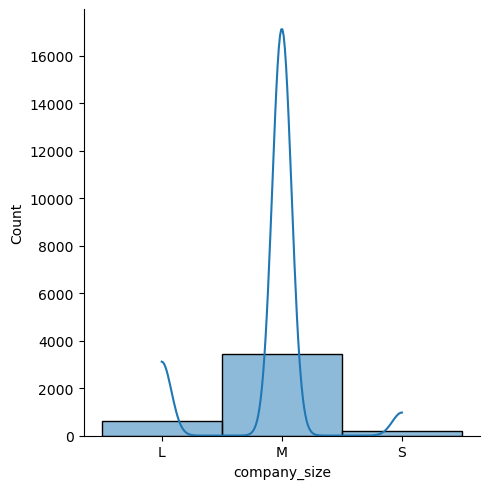

In [236]:
sns.displot(data=df_temp1, x="company_size", kde=True)

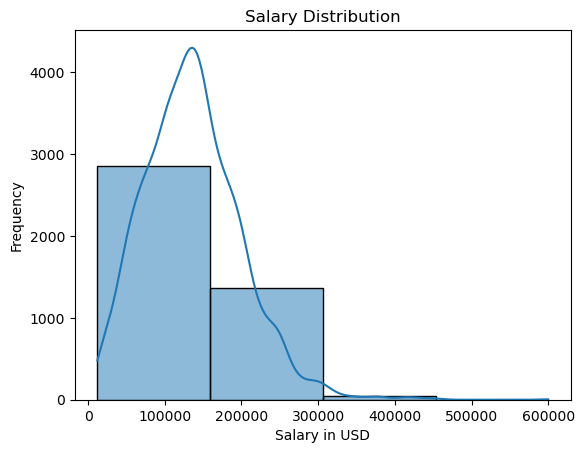

In [237]:
sns.histplot(df_temp1['salary_in_usd'], bins=4, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

In [238]:
#correlation_matrix = df_numerical.corr()

#plt.figure(figsize=(10, 8))

#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#plt.title('correlation coefficients between pairs of continuous variables')
#plt.show()

In [239]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [240]:
def replace_outliers_w_whisker(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    
    # Replace outliers with upper whisker if above Q3
    series[series > upper_whisker] = upper_whisker
    
    # Replace outliers with lower whisker if below Q1
    series[series < lower_whisker] = lower_whisker
    
    return series

In [241]:
df_temp1['salary_in_usd'] = replace_outliers_w_whisker(df_temp1['salary_in_usd'])

/tmp/ipykernel_42784/3010072375.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



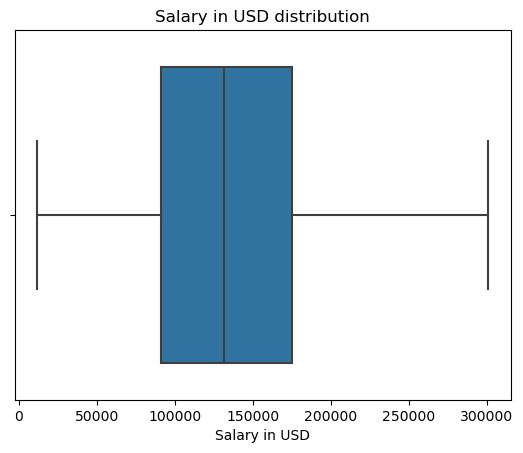

In [242]:
sns.boxplot(x='salary_in_usd', data=df_temp1)
plt.title('Salary in USD distribution')
plt.xlabel('Salary in USD')
plt.show() 

In [243]:
salary_series = df_temp1['salary_in_usd']
outliers = tukeys_test_outliers(salary_series)
print(outliers)
df_temp1.iloc[~outliers.index,:]

Series([], Name: salary_in_usd, dtype: float64)


,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [244]:
new_df = df_temp1

In [245]:
display(new_df)

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,Data Science & Machine Learning,85847.0,Europe,100,Europe,L
1,2023,SE,Data Science & Machine Learning,175000.0,North America,100,North America,M
2,2023,SE,Data Science & Machine Learning,120000.0,North America,100,North America,M
3,2023,SE,Data Science & Machine Learning,222200.0,North America,0,North America,L
4,2023,SE,Data Science & Machine Learning,136000.0,North America,0,North America,L
...,...,...,...,...,...,...,...,...
4263,2022,SE,Data Engineering & Infrastructure,154000.0,North America,100,North America,M
4264,2022,SE,Data Engineering & Infrastructure,126000.0,North America,100,North America,M
4265,2022,SE,Data Analysis & Analytics,129000.0,North America,0,North America,M
4266,2022,SE,Data Analysis & Analytics,150000.0,North America,100,North America,M


In [246]:
new_df.describe()

,work_year,salary_in_usd,remote_ratio
count,4268.000000,4268.000000,4268.000000
mean,2022.259372,135379.528351,49.238519
std,0.753381,60723.206819,48.446756
min,2020.000000,12000.000000,0.000000
25%,2022.000000,90933.500000,0.000000
50%,2022.000000,131526.000000,50.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,301099.750000,100.000000


In [247]:
new_df.columns

Index(['work_year', 'experience_level', 'job_title', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [248]:
# Assuming 'categorical_columns' is a list containing the names of columns you want to encode
categorical_columns = ['work_year', 'experience_level', 'job_title',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size']
# Perform one-hot encoding
df_encoded = pd.get_dummies(new_df, columns=categorical_columns)

# Print the first few rows to verify the changes
display(df_encoded.head())

,salary_in_usd,work_year_2020,work_year_2021,work_year_2022,work_year_2023,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Artificial Intelligence (AI),...,employee_residence_Other,remote_ratio_0,remote_ratio_50,remote_ratio_100,company_location_Europe,company_location_North America,company_location_Other,company_size_L,company_size_M,company_size_S
0,85847.0,False,False,False,True,False,False,False,True,False,...,False,False,False,True,True,False,False,True,False,False
1,175000.0,False,False,False,True,False,False,False,True,False,...,False,False,False,True,False,True,False,False,True,False
2,120000.0,False,False,False,True,False,False,False,True,False,...,False,False,False,True,False,True,False,False,True,False
3,222200.0,False,False,False,True,False,False,False,True,False,...,False,True,False,False,False,True,False,True,False,False
4,136000.0,False,False,False,True,False,False,False,True,False,...,False,True,False,False,False,True,False,True,False,False


In [249]:
# features contains the input features (all columns except 'salary_in_usd')
features = df_encoded.drop('salary_in_usd', axis=1)
#target is the target variable ('salary_in_usd')
target = df_encoded['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1234)

# test_size=0.2 specifies that 20% of the data will be used for testing
# random_state=1234 sets a random seed for reproducibility

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3414, 26)
Shape of X_test: (854, 26)
Shape of y_train: (3414,)
Shape of y_test: (854,)


In [250]:
#correlation_matrix = df_numerical.corr()

#plt.figure(figsize=(10, 8))

#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#plt.title('correlation coefficients between pairs of continuous variables')
#plt.show()

In [251]:
#from sklearn.preprocessing import LabelEncoder

In [252]:
#label_encoder = LabelEncoder()

In [253]:
# Iterate over each column and apply label encoding
#for column in new_df.columns:
#    if new_df[column].dtype == 'object':  # Check if the column contains categorical data
#        new_df[column] = label_encoder.fit_transform(new_df[column])
#    elif new_df[column].nunique() <= 25:  # Check if the column has a small number of unique values (assumed to be categorical)
#        new_df[column] = label_encoder.fit_transform(new_df[column])

#print("Encoded DataFrame:")
#display(new_df)

In [254]:
#corr_matrix = new_df.corr()
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()

In [255]:
#spearman_correlations = new_df.corrwith(new_df['salary_in_usd'], method='spearman')
#spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)
#spearman_correlations_sorted

In [256]:
# features contains the input features (all columns except 'salary_in_usd')
features = df_encoded.drop('salary_in_usd', axis=1)
#target is the target variable ('salary_in_usd')
target = df_encoded['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1234)

# test_size=0.2 specifies that 20% of the data will be used for testing
# random_state=1234 sets a random seed for reproducibility

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3414, 26)
Shape of X_test: (854, 26)
Shape of y_train: (3414,)
Shape of y_test: (854,)


In [257]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [258]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# n_estimators specifies the number of trees in the forest (you can adjust this parameter as needed)
# random_state sets a random seed for reproducibility

# Train the model on the training data (X_train and y_train)
random_forest_model.fit(X_train_scaled, y_train)

# Once the model is trained, you can use it to make predictions on the testing data (X_test)
predictions = random_forest_model.predict(X_test_scaled)

In [259]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [260]:
from sklearn.metrics import mean_absolute_error
lin_reg_train_preds = lin_reg.predict(X_train_scaled)
mean_absolute_error(y_train, lin_reg_train_preds)

36563.769258933804

In [261]:
lin_preds = lin_reg.predict(X_test_scaled)
mean_absolute_error(y_test, lin_preds)

34744.687060889926

In [262]:
# mape = mean_absolute_percentual_error = mean( abs(y - y_pred)/y )  # error 1euros when predicting 10 euros, than 1euro 
# scatterplot ( y_pred, vs y); y_pred = y; y_pred = 0 + y = 0 + 1 * y

In [263]:
absolute_percentage_errors = np.abs((y_train - lin_reg_train_preds) / y_train)
mean_absolute_percentage_error = np.mean(absolute_percentage_errors) * 100

In [264]:
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mean_absolute_percentage_error))

Mean Absolute Percentage Error (MAPE): 35.32%


In [265]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [266]:
forest_reg_train_preds = forest_reg.predict(X_train_scaled)
mean_absolute_error(y_train, forest_reg_train_preds)

31755.08310975571

In [267]:
forest_reg_preds = forest_reg.predict(X_test_scaled)
mean_absolute_error(y_test, forest_reg_preds)

33516.01574769646

In [268]:
absolute_percentage_errors = np.abs((y_train - forest_reg_train_preds) / y_train)
mean_absolute_percentage_error = np.mean(absolute_percentage_errors) * 100

In [269]:
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mean_absolute_percentage_error))

Mean Absolute Percentage Error (MAPE): 27.70%


(array([ 31.,  59.,  90.,  85., 158., 285., 130.,  11.,   4.,   1.]),
 array([ 21379.23142857,  46510.9976751 ,  71642.76392163,  96774.53016815,
        121906.29641468, 147038.06266121, 172169.82890774, 197301.59515427,
        222433.36140079, 247565.12764732, 272696.89389385]),
 <BarContainer object of 10 artists>)

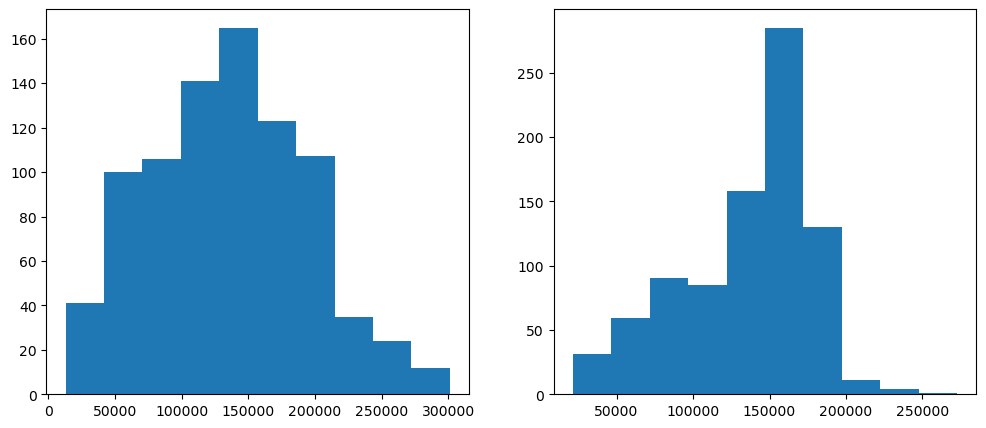

In [121]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(y_test)

plt.subplot(1, 2, 2)
plt.hist(forest_reg_preds)

In [122]:
from sklearn.model_selection import GridSearchCV

forest_param_grid = [
    {"n_estimators": [5, 10, 50, 100], "max_features": [4, 8, 12, 16], "max_depth": [5, 10, 50]},
]

forest_grid_search = GridSearchCV(
    RandomForestRegressor(),
    forest_param_grid,
    scoring="neg_mean_squared_error",
    return_train_score=True,
)

forest_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [5, 10, 50],
                          'max_features': [4, 8, 12, 16],
                          'n_estimators': [5, 10, 50, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [123]:
np.sqrt(-forest_grid_search.best_score_)

45932.98479464527

In [124]:
forest_grid_search.best_params_

{'max_depth': 10, 'max_features': 8, 'n_estimators': 100}

In [128]:
feature_names = [location for location in list(new_df["company_location"].value_counts().keys())[:5]] + ["OTHER"]
feature_names += [job_category for job_category in df_mapped_jobs.unique()]
#feature_names += [employment_type for employment_type in new_df["employment_type"].unique()]
feature_names += ['experience_level']

In [129]:
forest_feature_importances = forest_grid_search.best_estimator_.feature_importances_

for feature in zip(feature_names, forest_feature_importances):
    print(feature)

(3, 0.011340726394837655)
(2, 0.010332018714305098)
(1, 0.017611731981125874)
(5, 0.016115455421589427)
(4, 0.05005202352781315)
('OTHER', 0.047319502656481396)
('Data Science & Machine Learning', 0.04479734661508832)
('Data Analysis & Analytics', 0.07665216539301963)
('Data Engineering & Infrastructure', 5.549635451153967e-05)
('Business Intelligence (BI)', 0.011355158197578076)
('Data Management', 0.002379528678443906)
('Computer Vision', 0.0024586542463506836)
('Compliance & Quality Assurance', 0.004039944641945757)
('Artificial Intelligence (AI)', 0.0755111118219257)
('AI & Machine Learning Operations (MLOps)', 0.01613935565916545)
('experience_level', 0.015801289422791208)


In [130]:
for feature in zip(feature_names, forest_feature_importances):
    if feature[1] > 0.01:
        print(feature)
        

(3, 0.011340726394837655)
(2, 0.010332018714305098)
(1, 0.017611731981125874)
(5, 0.016115455421589427)
(4, 0.05005202352781315)
('OTHER', 0.047319502656481396)
('Data Science & Machine Learning', 0.04479734661508832)
('Data Analysis & Analytics', 0.07665216539301963)
('Business Intelligence (BI)', 0.011355158197578076)
('Artificial Intelligence (AI)', 0.0755111118219257)
('AI & Machine Learning Operations (MLOps)', 0.01613935565916545)
('experience_level', 0.015801289422791208)


In [ ]:
object_columns = new_df.select_dtypes("object").columns
print(object_columns)

In [ ]:
new_df_encoded = pd.get_dummies(new_df, columns=object_columns, dtype=int)

In [ ]:
display(new_df_encoded)

In [ ]:
potential_categorical_from_numerical = new_df_encoded.select_dtypes("number").loc[:,new_df_encoded.select_dtypes("number").nunique() < 20]

In [ ]:
df_categorical = pd.concat([new_df_encoded.select_dtypes("object"), potential_categorical_from_numerical], axis=1)
df_numerical = new_df_encoded.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [ ]:
display(df_categorical)

In [ ]:
spearman_correlations = df_numerical.corrwith(new_df_encoded['salary_in_usd'], method='spearman')

spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)

spearman_correlations_sorted

In [ ]:
# features contains the input features (all columns except 'salary_in_usd')
features = new_df_encoded.drop('salary_in_usd', axis=1)
#target is the target variable ('salary_in_usd')
target = new_df_encoded['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1234)

# test_size=0.2 specifies that 20% of the data will be used for testing
# random_state=1234 sets a random seed for reproducibility

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)